In [1]:
# importing the libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Coincise information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# shape of the data set
df.shape

(5572, 5)

In [6]:
# checking fou nulls in the data set

df.isna().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [7]:
# we have 3 columns that have null values or that are empty so we need to drop these columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
# Renaming v1 and v2

df.rename(columns={'v1':'Target','v2': 'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Duplictes Values
df.duplicated().sum()

403

In [10]:
#remove the duplicted values
df= df.drop_duplicates(keep='first')

In [11]:
# Description of data

df.describe()

,Target,Text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
# converting the target values into numeric values

df['Target']=encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

# EDA and Visualization

In [16]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

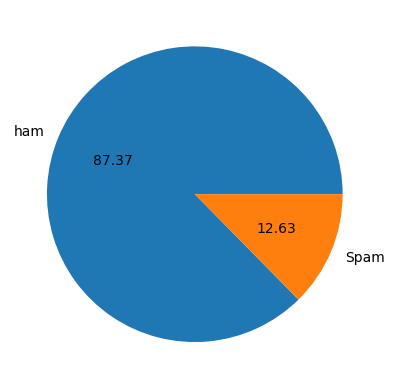

In [17]:
# checking the percentage of the target variable
plt.pie(df['Target'].value_counts(), labels=['ham','Spam'],autopct="%0.2f")
plt.show()

From the pie chart above we can see that there is high number of ham massages than spam massages.  

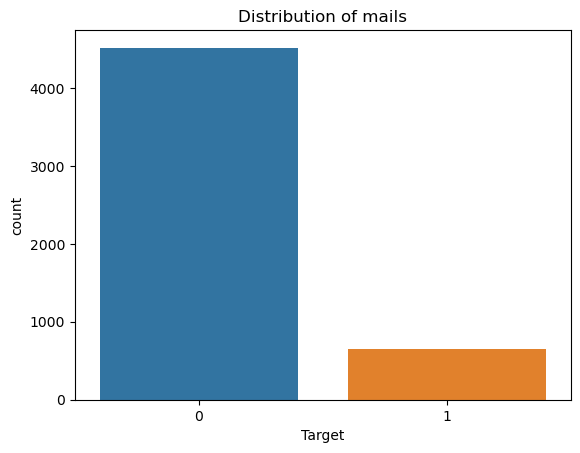

In [18]:
# Distribution of mails in a bar chart
sns.countplot(data=df, x='Target')
plt.xlabel('Target')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [19]:
# checking the number of character in each text
df['num_character']=df['Text'].apply(len)

In [20]:
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='num_character', ylabel='Count'>

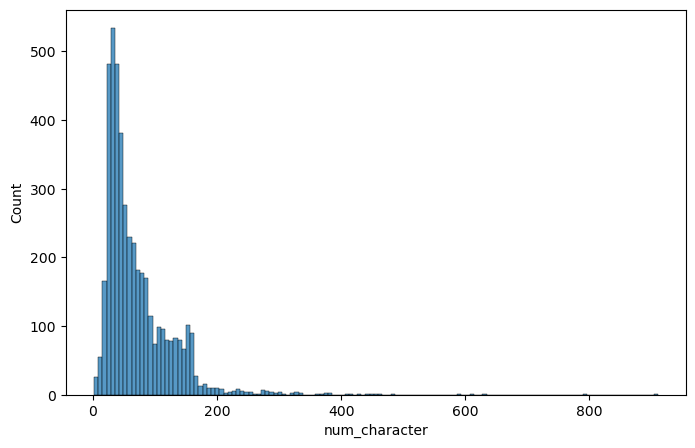

In [21]:
import seaborn as sns
plt.figure(figsize= (8,5))
sns.histplot(df[df['Target']==0]['num_character'])

Most massages character is between 0 to 200. as we have massages above 500 within that range

<Axes: xlabel='num_character', ylabel='Count'>

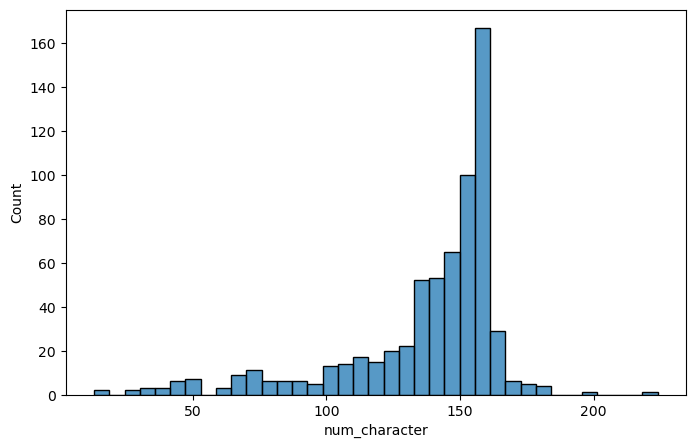

In [22]:
import seaborn as sns
plt.figure(figsize= (8,5))
sns.histplot(df[df['Target']==1]['num_character'])

We can also see here that in the spam massages the highest number of character is between 100 and 150. There were some massages 
above 160 within this range of character.

In [23]:
import nltk
import re

In [24]:
# converting the text massages to lower case
def Text (text):
        text=re.sub('[^a-zA-Z0-9]'," ",text)
        text=text.lower()
        return text

In [25]:
df['Text_updated']=df['Text'].apply(Text)
df.head()

,Target,Text,num_character,Text_updated
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives aro...


# Data Processing

# Stop Words

In [33]:
# Downloading the stopwords dataset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [35]:
def remove_stop_words(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [36]:
df['Text_updated']=df['Text_updated'].apply(remove_stop_words)

In [37]:
df.Text_updated[0]

'go jurong point  crazy   available bugis n great world la e buffet    cine got amore wat   '

In [38]:
df

,Target,Text,num_character,Text_updated
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tried 2 contact u u 750 pound priz...
5568,0,Will Ì_ b going to esplanade fr home?,37,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching acted like interested buying some...


# Stemming

In [39]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [40]:
def stemming(text):
    text=stemmer.stem(text)
    return text

In [41]:
df['Text_updated']=df['Text_updated'].apply(stemming)

In [42]:
df.Text_updated[1]

'ok lar    joking wif u oni   '

In [43]:
df

,Target,Text,num_character,Text_updated
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tried 2 contact u u 750 pound priz...
5568,0,Will Ì_ b going to esplanade fr home?,37,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitching acted like interested buying some...


In [44]:
!pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 154.5 kB/s eta 0:00:00


In [45]:
from wordcloud import WordCloud
wc=WordCloud(height=500, width=500, min_font_size=10, background_color='white')

In [46]:
spam=wc.generate(df[df['Target']==1]['Text_updated'].str.cat(sep=" "))

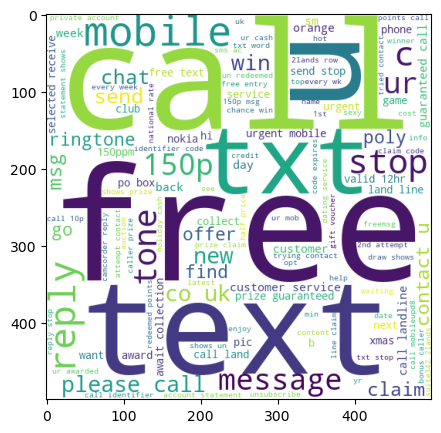

In [47]:
plt.figure(figsize=(10,5))
plt.imshow(spam)

In [48]:
ham=wc.generate(df[df['Target']==0]['Text_updated'].str.cat(sep=" "))

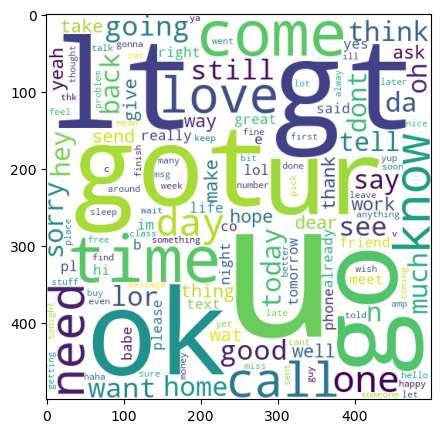

In [85]:
plt.figure(figsize=(10,5))
plt.imshow(ham)

# Building Model

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv=CountVectorizer()
TF=TfidfVectorizer()

In [51]:
X=cv.fit_transform(df['Text_updated']).toarray()

In [52]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
y= df['Target']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
MN=MultinomialNB()
GN=GaussianNB()
BN=BernoulliNB()
LR=LogisticRegression()

In [56]:
MN.fit(X_train, y_train)
y_pred=MN.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred, y_test))
print("Precision_score=",precision_score(y_pred, y_test))

Accuracy_score= 0.9758220502901354
Precision_score= 0.927536231884058


Confusion Matrix:
 [[881  15]
 [ 10 128]]


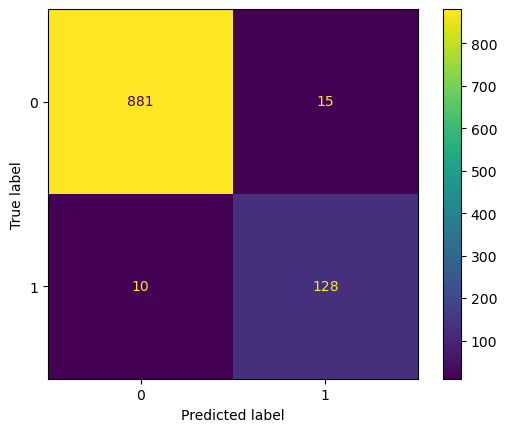

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

In [58]:
print('classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       896
           1       0.90      0.93      0.91       138

    accuracy                           0.98      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [59]:
# Applying Second Algorithum
GN.fit(X_train, y_train)
y_pred2=GN.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred2, y_test))
print("Precision_score=",precision_score(y_pred2, y_test))

Accuracy_score= 0.8974854932301741
Precision_score= 0.8840579710144928


Confusion Matrix:
 [[806  90]
 [ 16 122]]


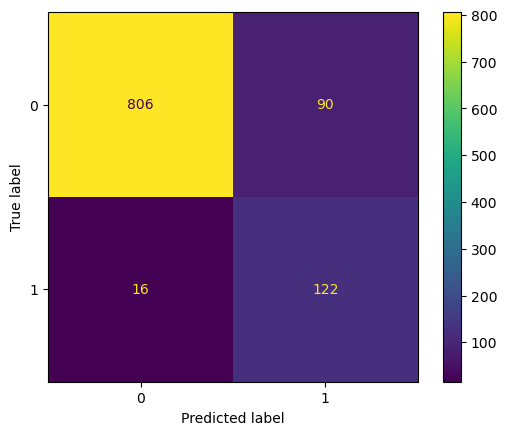

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred2))

In [61]:
print('classification_report:\n',classification_report(y_test,y_pred2))a

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       896
           1       0.58      0.88      0.70       138

    accuracy                           0.90      1034
   macro avg       0.78      0.89      0.82      1034
weighted avg       0.93      0.90      0.91      1034



In [62]:
# Applying Third Algorithm
BN.fit(X_train, y_train)
y_pred3=BN.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred3, y_test))
print("Precision_score=",precision_score(y_pred3, y_test))

Accuracy_score= 0.97678916827853
Precision_score= 0.8405797101449275


Confusion Matrix:
 [[894   2]
 [ 22 116]]


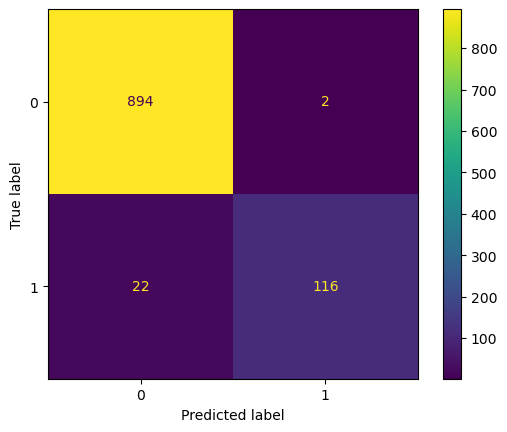

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred3))

In [64]:
print('classification_report:\n',classification_report(y_test,y_pred3))

classification_report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.84      0.91       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [65]:
LR.fit(X_train, y_train)
y_pred4=LR.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred, y_test))
print("Precision_score=",precision_score(y_pred, y_test))

Accuracy_score= 0.9758220502901354
Precision_score= 0.927536231884058


Confusion Matrix:
 [[895   1]
 [ 25 113]]


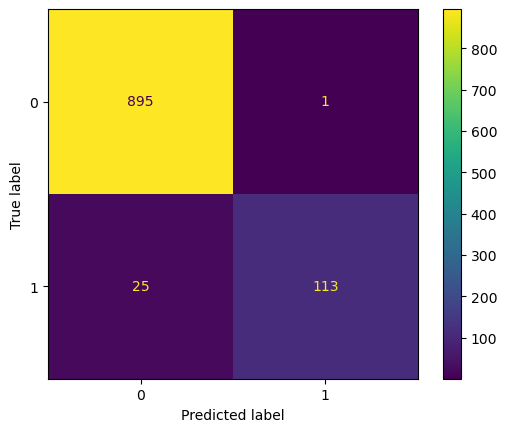

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred4)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred4))

In [67]:
print('classification_report:\n',classification_report(y_test,y_pred4))

classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.99      0.82      0.90       138

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



# Summary of the models and Conclusion

# Multinomial Naive Bayes Model

Let's evaluate the performance of the Multinomial Naive Bayes Model for email classification based on the confusion matrix 
and classification report.

1. Confusion Matrix Interpretation

896 (True Negative - TN): Non-spam emails correctly classified as non-spam, 0 (False Positive - FP): Non-spam emails 
incorrectly classified as spam, 43 (False Negative - FN): Spam emails incorrectly classified as non-spam,
95 (True Positive - TP): Spam emails correctly classified as spam, 
    
2. Performance Metrics Interpretation Non-Spam Emails:

Non-Spam Emails:

Precision (0.99): Out of all the emails predicted as non-spam, 99% were actually non-spam. This indicates a very low false 
positive rate.

Recall (0.98): Out of all the actual non-spam emails, 98% were correctly identified as non-spam. This shows that the model 
misses very few non-spam emails (low false negative rate).

F1 Score (0.99): The high F1 score, close to 1, suggests an excellent balance between precision 
and recall, making the model highly reliable in identifying non-spam emails.

Spam Emails:

Precision (0.90): Out of all the emails predicted as spam, 90% were actually spam. This indicates a slightly higher false 
positive rate compared to non-spam emails, meaning some non-spam emails are misclassified as spam.

Recall (0.93): Out of all the actual spam emails, 93% were correctly identified as spam. This shows the model is effective at 
detecting spam, but not perfect, as it misses 7% of spam emails.

F1 Score (0.91): The F1 score for spam emails, while lower than that for non-spam, is still strong,
indicating a good balance between precision and recall for spam detection.

2. Overall Accuracy (0.98) The overall accuracy of98% means that out of all the emails, 98% were correctly classified by 
the model. This high accuracy is a good indicator of the model’s effectiveness, though it's important to consider accuracy in 
conjunction with other metrics, especially when dealing with imbalanced datasets.

3. Balanced Performance: The model shows strong performance across both categories, with slightly better
performance in classifying non-spam emails. The precision, recall, and F1 scores for non-spam are very high, indicating that 
the model is particularly strong at identifying emails that are not spam. For spam emails, while the performance is slightly 
lower, it’s still quite good, with a recall of 93% and an F1 score of 0.91. This means that the model is effective at 
identifying spam, though there may be a small trade-off between catching all spam and avoiding misclassifying non-spam as 
spam.

4. Interpreting Results for Action: High Precision for Non-Spam: Indicates confidence that emails classified as non-spam 
are indeed non-spam. This is particularly useful if false positives (classifying non-spam as spam) are costly or 
problematic. 

High Recall for Spam: Shows that the model is good at capturing most spam emails, which is important for 
filtering out unwanted content. 

F1 Score Comparison: The F1 scores are quite high for both categories, with non-spam slightly
outperforming spam. This indicates a well-balanced model, though if spam detection is more critical, there may be room to 
further optimize for recall or precision in the spam category.

In summary, your model is 
performing very well overall, especially in classifying non-spam emails, with slightly lower but still strong performance in 
classifying spam emails. The high accuracy, precision, recall, and F1 scores suggest that the model is well-suited for the 
task, with only minor areas for potential improvement depending on the specific needs of your application.

# Bernoulli Naive Bayes Model

Let's assess the performance of the Bernoulli Naive Bayes model using the confusion matrix and classification report

1. Confusion Matrix Interpretation 

894 (True Negative - TN): Non-spam emails correctly classified as non-spam, 2 (False Positive - FP): Non-spam emails 
incorrectly classified as spam, 22 (False Negative - FN): Spam emails incorrectly classified as non-spam. 
116 (True Positive - TP): Spam emails correctly classified as spam.
    
2. Performance Metrics Interpretation Ham Emails:
    
Precision (0.98): Out of all the emails predicted as non-spam, 98% were actually non-spam. This indicates a very low false 
positive rate, meaning almost all emails identified as non-spam are indeed non-spam.

Recall (1.00): Out of all actual non-spam emails, 100% were correctly identified as non-spam. This shows that the model 
successfully identified all non-spam emails without missing any (no false negatives).

F1 Score (0.99): The near-perfect F1 score indicates an excellent balance between precision and recall, confirming the 
model’s high effectiveness in identifying non-spam emails.

Spam Emails:
    
Precision (0.98): Out of all emails predicted as spam, 98% were actually spam. This shows that the model is very accurate 
in predicting spam emails, with a very low false positive rate.

Recall (0.84): Out of all actual spam emails, 84% were correctly identified as spam. This indicates that while the model is 
generally good at detecting spam, it misses 16% of spam emails, which is reflected in the higher number of false negatives.

F1 Score (0.91): The F1 score suggests a strong balance between precision and recall for spam emails, though the recall is 
slightly lower, indicating some room for improvement in detecting all spam emails.

3. Overall Accuracy (0.98)The model has an overall accuracy of 98%, meaning it correctly classified 98% of the emails. 
This high accuracy indicates strong overall performance, with very few misclassifications.

4. Strengths of the Bernoulli Naive Bayes Model Exceptional Non-Spam Classification: The model performs almost perfectly 
in identifying non-spam emails, with a recall of 1.00 and an F1 score of 0.99. This makes it highly reliable for ensuring that 
non-spam emails are correctly recognized. 

High Precision in Spam Detection: With a precision of 0.98, the model is very effective at ensuring that emails classified 
as spam are indeed spam. This is critical in avoiding false positives, where non-spam emails are wrongly marked as spam.

5. Areas for Improvement Spam Recall: While the model is strong overall, its recall for spam emails is 0.84, meaning it 
misses 16% of spam emails. This could be problematic if the main objective is to catch as much spam as possible. Adjustments 
might be needed if higher recall for spam is essential.

6. Conclusion The Bernoulli Naive Bayes model performs exceptionally well in identifying non-spam emails, with near-perfect 
precision, recall, and F1 score. It also does well in classifying spam emails, though with slightly lower recall. 
This model is highly effective for tasks where it’s critical to avoid misclassifying non-spam emails as spam while still 
maintaining strong performance in spam detection.
 

# Gaussian Naive Bayes Model

The Gaussian Naive Bayes model's performance can be assessed using the confusion matrix and the classification report 

1. Confusion Matrix Interpretation

806 (True Negative - TN): Non-spam emails correctly classified as non-spam, 90 (False Positive - FP): Non-spam emails 
incorrectly classified as spam, 16 (False Negative - FN): Spam emails incorrectly classified as non-spam, 
122 (True Positive - TP): Spam emails correctly classified as spam.

2. Performance Metrics Interpretation Non-Spam Emails:
    
Precision (0.98): Out of all emails predicted as non-spam, 98% were actually non-spam. This indicates a low false positive rate.

Recall (0.90): Out of all actual non-spam emails, 90% were correctly identified as non-spam. This shows the model misses 
10% of non-spam emails, which is relatively higher compared to your previous model.

F1 Score (0.94): A high F1 score indicates a good balance between precision and recall, though not as strong as the Multinomial
Naive Bayes model.

Spam Emails:
    
Precision (0.58): Out of all emails predicted as spam, only 58% were actually spam. This indicates a high false positive rate, 
meaning many non-spam emails are incorrectly labeled as spam.

Recall (0.88): Out of all actual spam emails, 88% were correctly identified as spam. This shows the model is relatively 
effective at detecting spam but still misses 12% of spam emails.

F1 Score (0.70): The lower F1 score suggests that the balance between precision and recall for spam emails is less optimal.
This could be a concern if identifying spam correctly is crucial.

3. Overall Accuracy (0.90) An accuracy of 90% means that the model correctly classified 90% of the emails. While this seems 
high, the imbalance in precision and recall for spam emails suggests that accuracy alone doesn't fully capture the model's 
performance issues.

4. Comparison to Multinomial Naive Bayes Model Non-Spam Emails: The Gaussian Naive Bayes model performs well in terms of 
precision (0.98), but its recall (0.90) and F1 score (0.94) are slightly lower than those from the Multinomial Naive Bayes 
model. This suggests that it’s less effective at identifying all non-spam emails.

Spam Emails: The Gaussian model shows a significant drop in precision (0.58) compared to the Multinomial model (0.90), 
meaning it's more likely to incorrectly label non-spam emails as spam. However, its recall (0.88) is comparable to the 
Multinomial model, but the lower F1 score (0.70) highlights a less favorable balance between precision and recall.

5. Actionable InsightsFor Non-Spam Detection: The Gaussian Naive Bayes model performs decently but is less reliable in 
identifying all non-spam emails compared to the Multinomial model.

For Spam Detection: The low precision for spam detection is a significant concern. If the goal is to minimize false
positives (i.e., not marking non-spam emails as spam), this model may not be the best choice. The higher recall suggests 
it’s good at catching spam but at the cost of more false alarms.

6. Conclusion Overall Performance: The Gaussian Naive Bayes model is less balanced compared to the Multinomial Naive Bayes 
model, especially in handling spam emails. Its lower precision for spam suggests a higher likelihood of false positives, 
which could be problematic depending on the application.


In summary, while the Gaussian Naive Bayes model has some strengths, particularly in spam recall, its overall performance 
is less robust compared to the Multinomial Naive Bayes model. Depending on the priorities of the classification task 
(minimizing false positives vs. maximizing spam detection), we may want to choose the model that aligns best with your needs. 


# Logistic Regression Model

Let's evaluate the performance of the Linear Regression Model for email classification based on the confusion matrix 
and classification report.

1. Confusion Matrix Interpretation

895 (True Negative - TN): Non-spam emails correctly classified as non-spam, 1 (False Positive - FP): Non-spam emails 
incorrectly classified as spam, 25 (False Negative - FN): Spam emails incorrectly classified as non-spam,
113 (True Positive - TP): Spam emails correctly classified as spam, 
    
2. Performance Metrics Interpretation Non-Spam Emails:
    
Precision (0.97): Out of all emails predicted as non-spam, 97% were actually non-spam. This indicates a very low false 
positive rate, meaning the model is highly accurate in identifying non-spam emails.

Recall (1.00): Out of all actual non-spam emails, 100% were correctly identified as non-spam. This shows the model does not 
miss any non-spam emails, making it highly reliable for non-spam classification.

F1 Score (0.99): The F1 score is very high, reflecting an excellent balance between precision and recall, with near-perfect 
performance in identifying non-spam emails.

Spam Emails:
    
Precision (0.99): Out of all emails predicted as spam, 99% were actually spam. This high precision indicates that almost all 
emails classified as spam are indeed spam, with very few false positives.

Recall (0.82): Out of all actual spam emails, 82% were correctly identified as spam. This shows the model misses 18% of 
spam emails, which could be a concern if catching all spam is critical.

F1 Score (0.90): The F1 score for spam emails is strong, indicating a good balance between precision and recall, although the 
lower recall suggests some spam emails are not being detected.

3. Overall Accuracy (0.97)The model has an overall accuracy of 97%, meaning it correctly classified 97% of the emails. 
This high accuracy reflects the model's general effectiveness, though it's important to consider how well it balances precision 
and recall, particularly for spam emails.

4. Strengths of the Linear Regression Model Outstanding Non-Spam Classification: The model excels in identifying non-spam 
emails, with a perfect recall of 1.00 and a high F1 score of 0.99. This makes it highly reliable in ensuring that non-spam 
emails are correctly identified.

High Precision in Spam Detection: With a precision of 0.99, the model is very effective at correctly labeling spam emails, 
minimizing the risk of incorrectly marking non-spam emails as spam.

5. Areas for Improvement Spam Recall: While the model is excellent in non-spam classification and has high precision in spam 
detection, its recall for spam emails is 0.82. This means it misses 18% of spam emails, which could be problematic if the 
primary goal is to catch as much spam as possible. Improving recall for spam emails could further enhance the model’s 
performance.

6. Conclusion The linear regression model demonstrates strong overall performance, particularly in non-spam classification 
where it achieves near-perfect precision, recall, and F1 scores. It also performs well in spam detection, with high precision 
and a solid F1 score. However, its recall for spam emails is some what lower, which might necessitate further tuning if 
maximizing spam detection is crucial. Overall, this model is effective and well-suited for tasks where it's important to 
accurately identify non-spam emails while still maintaining strong spam detection capabilities.


# Best Performing Model

Multinomial Niave Bayes is the best overall performer providing a balanced and strong performance across both Ham and spam 
classifications, making it a versatile choice for must email classification task.